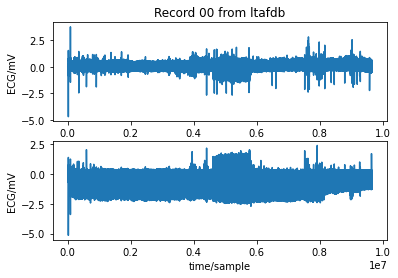

{'record_name': '00',
 'n_sig': 2,
 'fs': 128,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 9661440,
 'base_time': datetime.time(9, 30),
 'base_date': datetime.date(2003, 1, 31),
 'comments': [],
 'sig_name': ['ECG', 'ECG'],
 'p_signal': array([[-0.00599   ,  0.01734004],
        [-0.01197999,  0.02312005],
        [ 0.00599   ,  0.01734004],
        ...,
        [-0.15573991, -0.20808046],
        [-0.15573991, -0.15606034],
        [-0.23360987, -0.39304086]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['00.dat', '00.dat'],
 'fmt': ['16', '16'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [166.945, 173.01],
 'baseline': [0, 0],
 'units': ['mV', 'mV'],
 'adc_res': [0, 0],
 'adc_zero': [0, 0],
 'init_value': [-1, 3],
 'checksum': [-8202, 6311],
 'block_size': [0, 0],
 'base_datetime': datetime.datetime(2003, 1, 31, 9, 30)}

In [38]:
from wfdb import rdsamp, rdheader, rdrecord, plot_wfdb
import wfdb
from IPython.display import display
record  = rdrecord('./ltafdb/00')
plot_wfdb(record=record, title='Record 00 from ltafdb') 
display(record.__dict__)

In [1]:
with open('./ltafdb/RECORDS') as f:
    lines = f.readlines()
lines = [line[:-1] for line in lines]
lines
import pandas as pd
import wfdb
for lin in lines:
    sig, fields = wfdb.rdsamp('./ltafdb/'+lin)
    df = pd.DataFrame(sig)
    df['#sample'] = df.index+1
    df.index = df['#sample']
    df.rename(columns={0:'ECG1',1:'ECG2'},inplace=True)
    df.drop(['#sample'], inplace=True,axis=1)
    df.to_csv('./ltafdb_samples/'+lin+'_sample.csv') 

In [37]:
for lin in lines:
    annotation = wfdb.rdann('./ltafdb/'+lin, 'atr')
    dict = annotation.__dict__
    list_keys = ['symbol','sample','aux_note','subtype','chan','num']
    for key in list(dict.keys()):
        if key not in list_keys:
            dict.pop(key)
    df = pd.DataFrame(dict)
    df.to_csv('./ltafdb_annotations/'+lin+'_annotation.csv',index=False)